- competition/dataset : [https://www.kaggle.com/c/porto-seguro-safe-driver-prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction)
- date : 2021/01/25 - 2021/01/26
- original : [https://www.kaggle.com/bertcarremans/data-preparation-exploration](https://www.kaggle.com/bertcarremans/data-preparation-exploration)

## Data Preparation & Exploration

**✏ 필사 1회** 

### Introduction
PorteSeguro 대회의 데이터에 대한 좋은 인사이트를 얻고, 모델링을 위해 데이터를 준비하는 방법을 주는데 초점을 두었습니다.  

1. Visual inspection of your data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

### 1. Visual inspection of your data

#### Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

#### Loading data

In [2]:
train = pd.read_csv('../data/porto_train.csv')
test = pd.read_csv('../data/porto_test.csv')

#### Data at first site
대회의 데이터 설명 일부입니다.  

* 유사한 그룹에 속한 feature들은 feature 이름에 태그가 지정됩니다. (ind, reg, car, calc)  
* feature 이름은 뒷부분에 binary feature를 나타내는 **bin**과 범주형 feature를 나타내는 **cat**이 포함됩니다.  
* 이러한 이름이 없는 feature는 연속형이거나 순서형입니다.  
* **-1**은 결측값을 나타냅니다.  
* 타겟 컬럼은 해당 정책 소유자에 대한 클레임이 있는지의 여부를 나타냅니다.

In [3]:
train.head(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0


In [4]:
train.tail(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


우리는 다음과 같은 사항들을 확인할 수 있었습니다:  
* 이진변수  
* 정수로 된 범주형 변수
* 결측값 -1을 포함한 변수
* 타겟 변수와 ID 변수  

트레이닝 데이터의 행과 컬럼의 수를 살펴봅시다.

In [5]:
train.shape

(595212, 59)

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

컬럼 59개, 행 595,212개이며, 중복된 행은 존재하지 않습니다. 테스트 데이터에도 컬럼 개수가 같은지 확인해봅시다.

In [7]:
test.shape

(892816, 58)

테스트 셋에는 하나의 변수가 모자란데, 바로 타겟 변수입니다. 
이제 각 유형의 변수가 몇개인지 살펴봅시다.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

info() 메소드를 사용하여 데이터의 타입을 확인할 수 있습니다. 데이터 셋에는 null값이 존재하지 않는데, 결측치가 이미 -1로 대체되었기 때문에 정상적인 모습입니다. 후에 다루도록 하겠습니다.

### 2. Defining the metadata
데이터 관리를 유용하게 하기 위해, 이제 데이터프레임에 변수들에 대한 메타정보를 저장하겠습니다. 이것은 분석, 시각화, 모델링 등을 위해 특정 변수를 선택하고자 할 때 유용할 것입니다.  

* **role**: input, ID, target
* **level**: nomial, interval, ordinal, binary
* **keep**: True or False
* **dtype**: int, float, str

In [9]:
data = []
for f in train.columns:
    # role 정의
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # level 정의
    if ('bin' in f) or (f == 'target'):
        level = 'binary'
    elif ('cat' in f) or (f == 'id'):
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
    
    # keep 생성, id만 false 입력
    keep = True
    if f == 'id':
        keep = False
    
    # dtype 정의
    dtype = train[f].dtype
    
    # 메타데이터 딕셔너리 생성
    f_dict = {
        'varname':f,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype':dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [10]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


예시로 제거되지 않은 변수를 추출해봅시다.

In [11]:
meta[(meta.level == 'nominal')&(meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

role과 level별 변수의 개수를 확인할 수 있습니다.

In [12]:
pd.DataFrame({'count':meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### 3. Descriptive statistics
또한 describe 메소드를 적용할 수 있습니다. 그러나 범주형 변수와 id 컬럼에 대한 평균, 표준편차 등을 계산하는 것은 별로 의미가 없습니다. 뒤에서 범주형 변수를 시각적으로 살펴보겠습니다.  

메타 파일 덕분에 기술통계를 계산할 변수들을 쉽게 선택할 수 있습니다. 좀더 확실하게 하기 위해 데이터 타입별로 확인해보겠습니다.

#### Interval variables

In [13]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**reg 변수**  
* ps_reg_03에만 결측값 존재
* 변수별로 최솟값~최댓값 범위가 다름. 사용할 분류기에 따라 StandardScaler와 같은 스케일링 사용  

**car 변수**  
* ps_car_12, ps_car_14에 결측값 존재
* 최솟값~최댓값 범위 다름

**calc 변수**  
* 결측값 없음
* 모든 calc 변수는 비슷한 분포를 가짐  

구간 변수들의 범위가 생각보다 작은 편임을 볼 수 있습니다. 데이터의 익명화를 위해 이미 로그와 같은 변환을 적용한 것이 아닐까요?

#### Ordinal variables

In [14]:
v = meta[(meta.level == 'ordinal')&(meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* 결측값은 ps_car_11에만 존재
* 다양한 범위를 다루기 위해 scaling 사용 가능

#### Binary variables

In [15]:
v = meta[(meta.level == 'binary')&(meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* target 데이터는 1의 비율이 36.45%로 매우 불균형합니다.
* 평균으로부터 대부분 값이 거의 0임을 알 수 있습니다.

### 4. Handling imbalanced classes
위에서 언급했던 것처럼 target=1이 target=0에 비해 훨씬 적습니다. 이것은 좋은 정확도를 주지만 실전에 사용되기는 어려운 모델이 될 수 있습니다. 이러한 문제를 다루기 위한 두 가지 가능한 전략이 있습니다.  

* target=1 기록에 대한 오버샘플링
* target=0 기록에 대한 언더샘플링  

더 많은 전략들이 있고, [MachineLearningMastery.com](MachineLearningMastery.com)에서 확인할 수 있습니다. 우리는 트레이닝 셋이 크기 때문에 언더샘플링을 진행할 수 있습니다.

In [16]:
desired_apriori = 0.10

# target 값의 인덱스
idx_0 = train[train['target'] == 0].index
idx_1 = train[train['target'] == 1].index

# target 값의 개수
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# target = 0인 데이터를 사용하여 언더샘플링 비율와 결과 레코드 수 계산
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# 원하는 apriori를 얻기 위해 랜덤으로 target = 0의 레코드 선택
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# 인덱스 충돌
idx_list = list(undersampled_idx) + list(idx_1)

# undersample 데이터프레임 리턴
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


### 5. Data quality checks

#### Checking missing values
결측값 = -1

In [17]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


* **ps_car_03_cat**과 **ps_car_05_cat**는 결측값이 너무 많으므로 변수를 제거합니다.
* 결측값이 있는 다른 범주형 변수들의 경우에는 -1을 그대로 둘 수 있습니다.
* **ps_reg_03**(연속형)은 18%의 결측값을 가지고 있으므로, 평균값으로 대체합니다.
* **ps_car_11**(순서형)은 1개의 결측값을 가지고 있으므로, 평균값으로 대체합니다.
* **ps_car_14**(연속형)는 7%의 결측값을 가지고 있으므로, 평균값으로 대체합니다.

In [18]:
# 결측값이 너무 많은 변수 제거
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False

In [19]:
# mean이나 mode값 입력
mean_imp = SimpleImputer(missing_values= -1, strategy='mean')
mode_imp = SimpleImputer(missing_values= -1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

#### Checking the cardinality of the categorical variables
cardinality는 변수의 여러 값들의 수를 나타냅니다. 후에 범주형 변수들로부터 더미 변수를 만들 것이기 때문에 범주 값이 많은지 확인해야 합니다. 이러한 변수들은 너무 많은 더미 변수를 만들어내기 때문에 다른 방법으로 처리해야 합니다.

In [20]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


**ps_car_11_cat**은 매우 많은 범주 값들을 가지고 있습니다.  

**수정**: [nickycan](https://www.kaggle.com/nickycan)은 내 첫 솔루션이 데이터 누수를 야기할 수 있다는 사실에 대한 훌륭한 발언을 했습니다. 또한 이것에 대해 다룬 [oliver](https://www.kaggle.com/ogrellier)의 커널을 알려주었습니다. 따라서 해당 부분은 oliver의 커널 내용으로 변경했습니다.

#### Target encoding with smoothing
min_samples_leaf는 이전 평균과 목표 평균이 같은 가중치를 가지는 임계값을 정의합니다. 이전 임계값 미만과 평균 이상은 더욱 중요해진다.  

가중치가 값의 개수에 따라 어떻게 변하는지는 평활화 파라미터에 의해 제어됩니다.

평활화는 [Daniele Micci-Barreca](https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf)의
자료를 따랐습니다.
* trn_series: Series 형태의 트레이닝 범주형 변수  
* tst_series: Series 형태의 테스트 범주형 변수  
* target: Series 형태의 target 데이터  
* min_samples_leaf: 범주 평균을 계산하기 위한 최소 샘플 수 (int)  
* smoothing: 범주형 평균과 이전 값의 균형을 맞추기 위한 평활화 효과 (int)  

In [21]:
# https://www.kaggle.com/ogrellier 참고
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level*np.random.randn(len(series)))

def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    # 조건이 맞지 않으면 AssertionError
    temp = pd.concat([trn_series, target], axis=1)
    
    # target 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    
    # 평활화 계산
    smoothing = 1 / (1 + np.exp(-(averages['count']-min_samples_leaf)/smoothing))
    
    # 모든 target 데이터에 평균 적용
    prior = target.mean()
    averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)
    
    # trn, tst 시리즈에 평균 적용
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # 인덱스 저장
    ft_trn_series.index = trn_series.index
    
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [22]:
train_encoded, test_encoded = target_encode(
    train['ps_car_11_cat'],
    test['ps_car_11_cat'],
    target=train.target,
    min_samples_leaf=100,
    smoothing=10,
    noise_level=0.01
)
train['ps_car_ll_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

### 6. Exploratory data visualization

#### Categorical variables
범주형 변수와 target = 1의 비율을 확인해봅시다.

<Figure size 432x288 with 0 Axes>

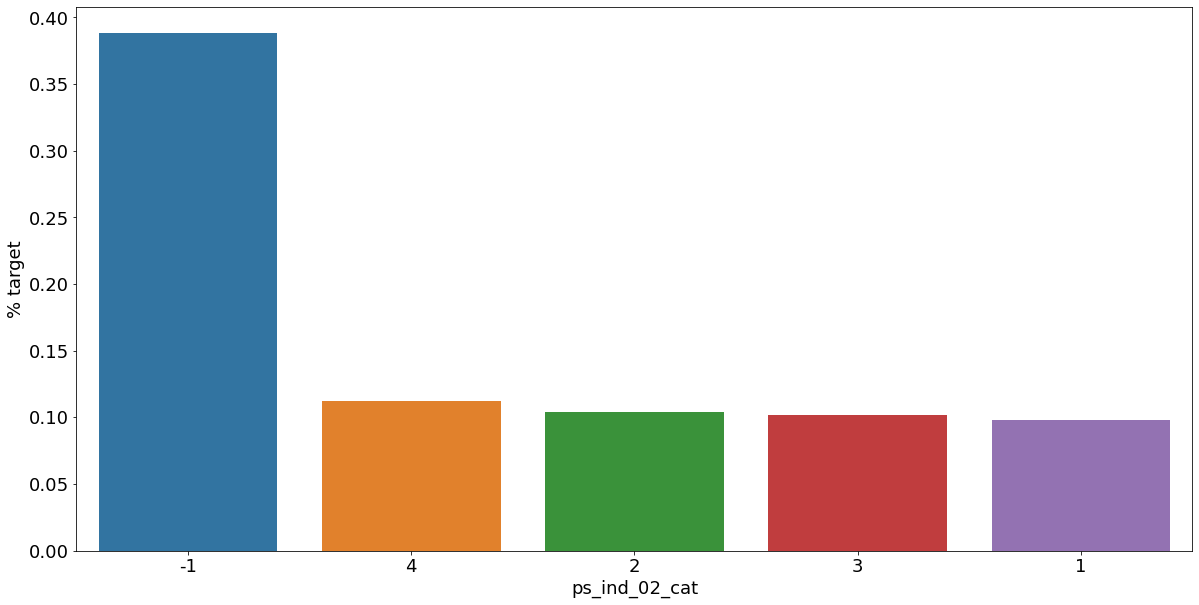

<Figure size 432x288 with 0 Axes>

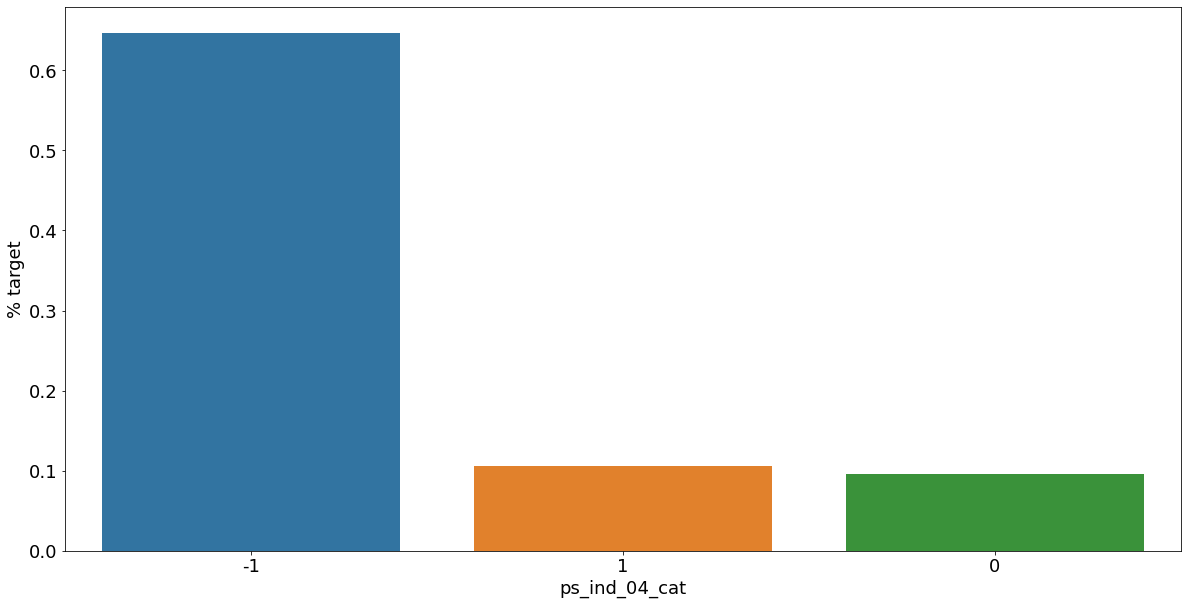

<Figure size 432x288 with 0 Axes>

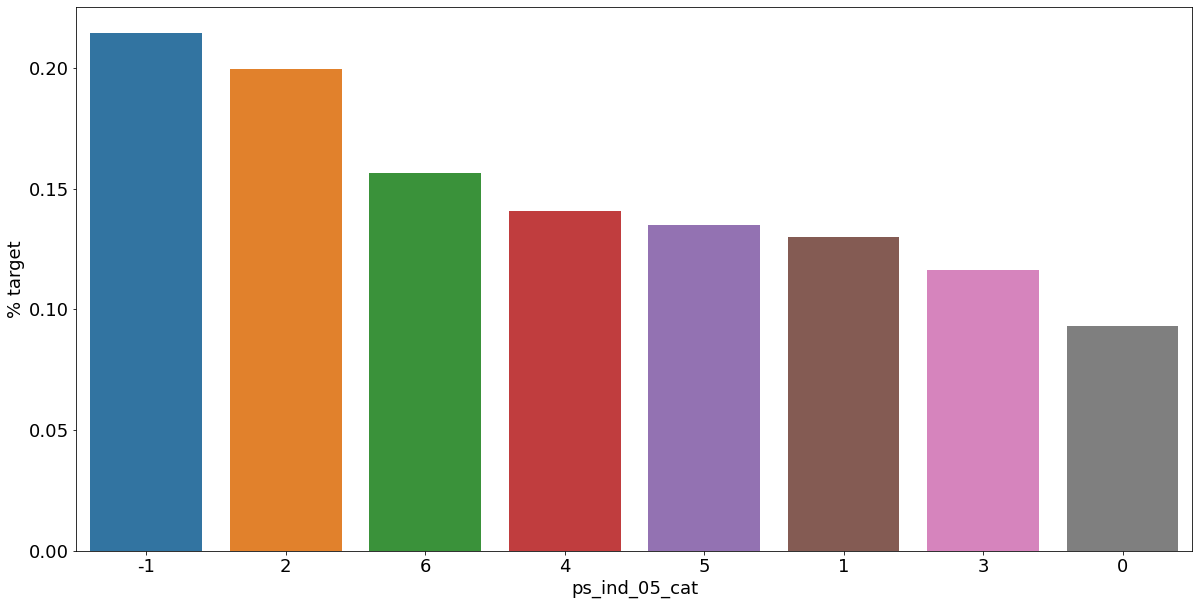

<Figure size 432x288 with 0 Axes>

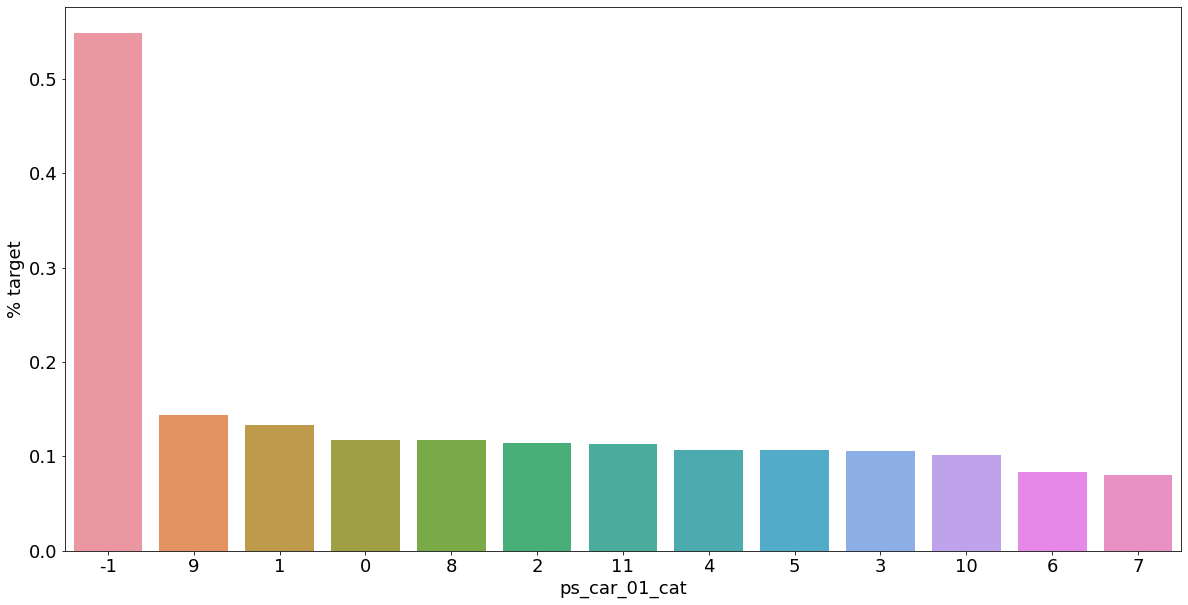

<Figure size 432x288 with 0 Axes>

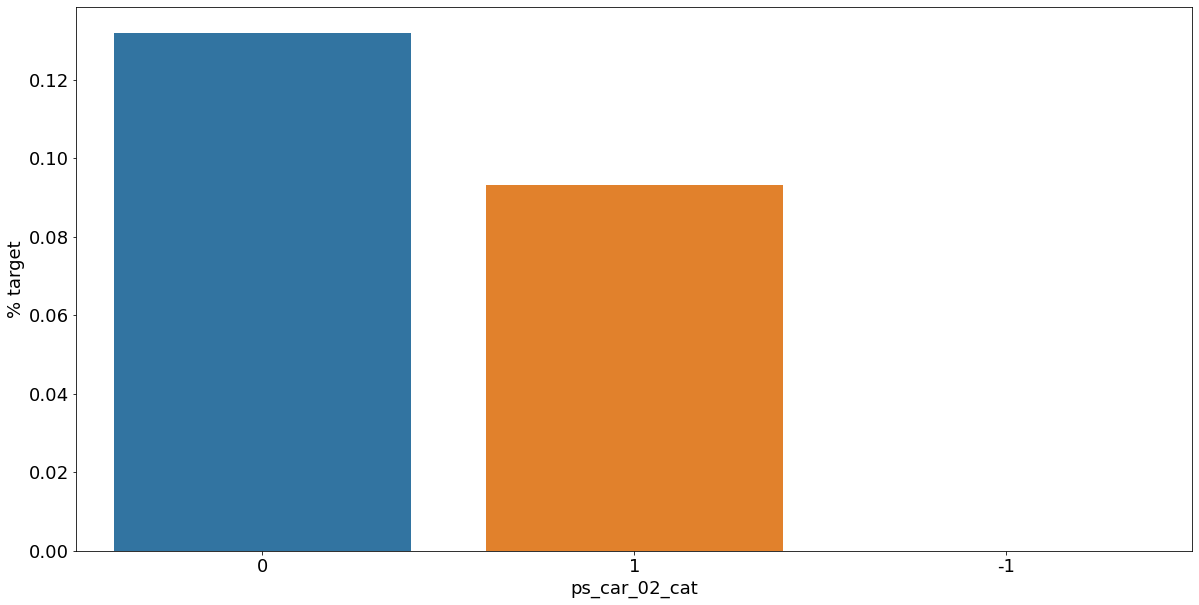

<Figure size 432x288 with 0 Axes>

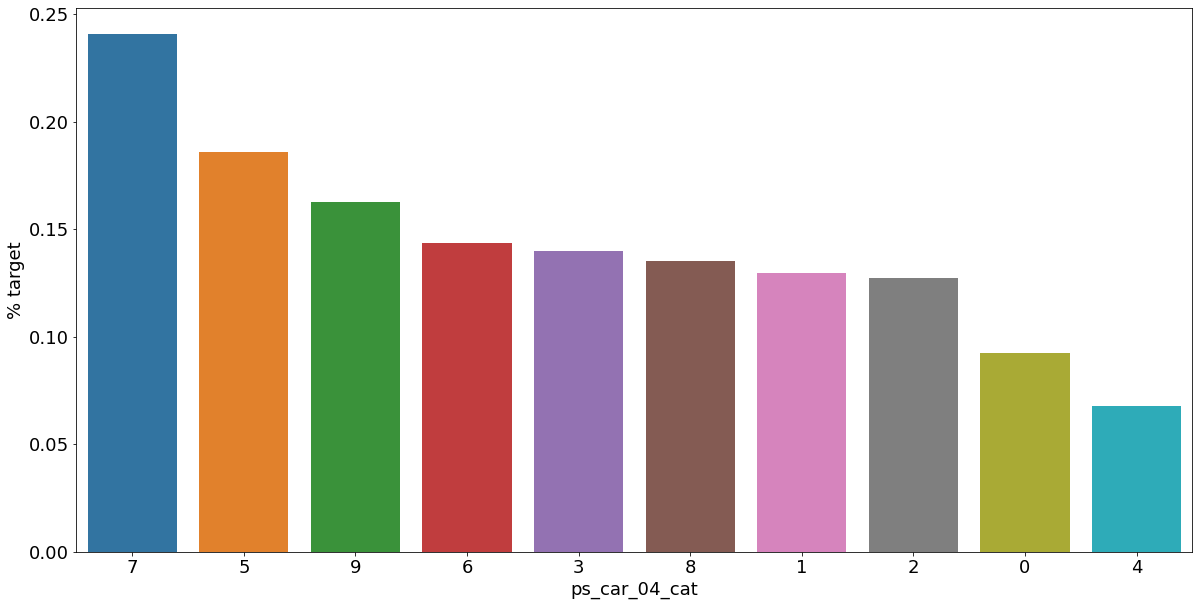

<Figure size 432x288 with 0 Axes>

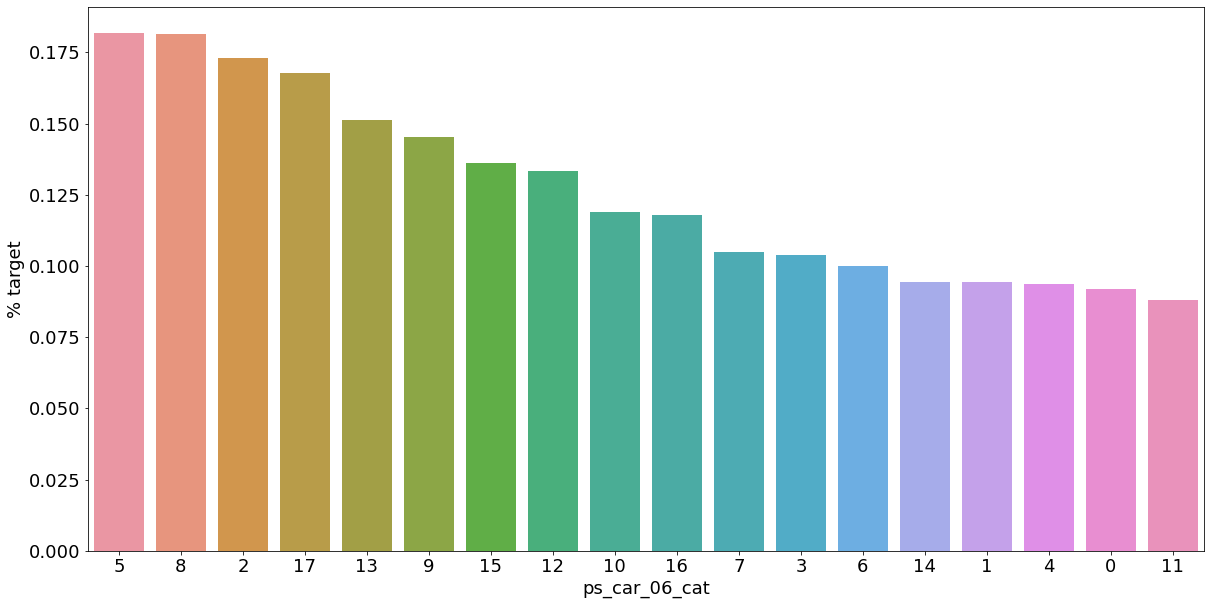

<Figure size 432x288 with 0 Axes>

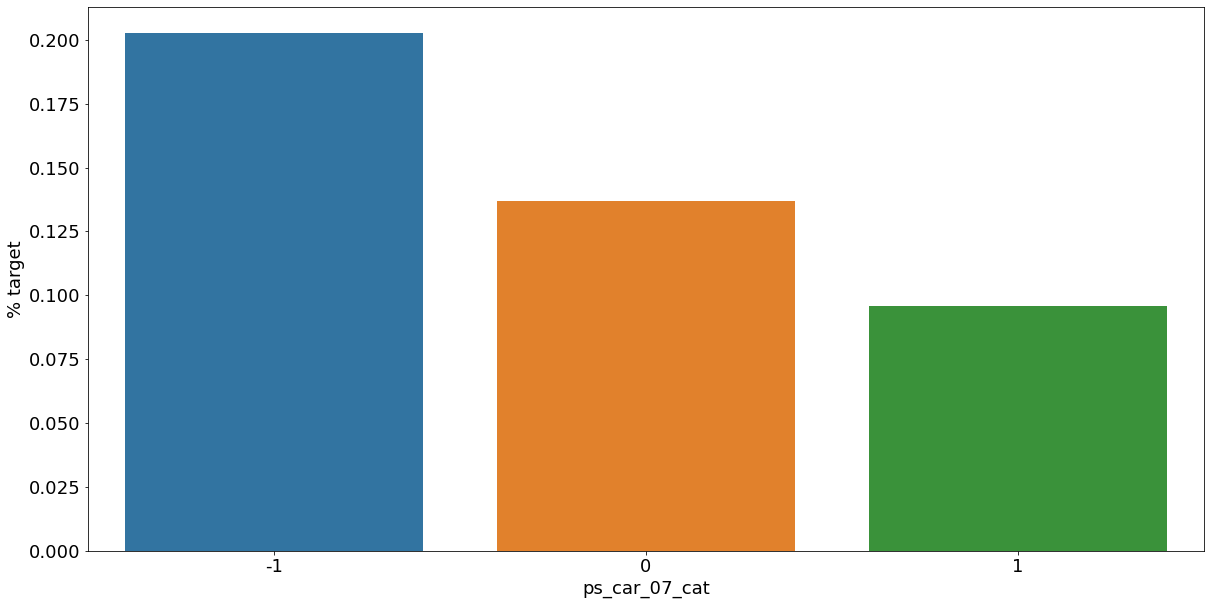

<Figure size 432x288 with 0 Axes>

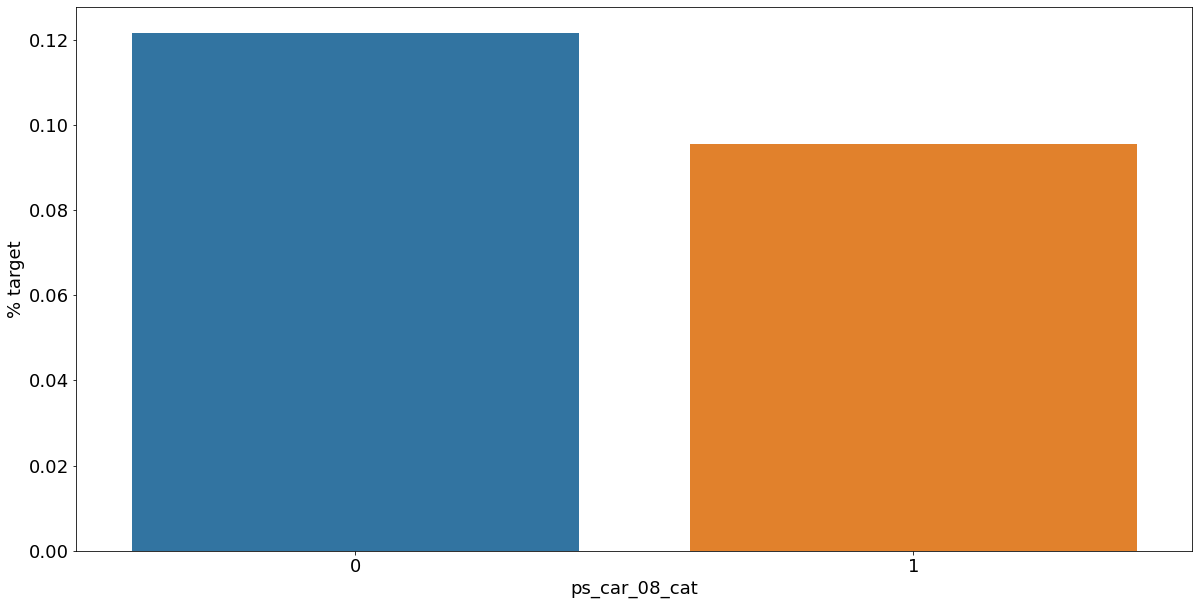

<Figure size 432x288 with 0 Axes>

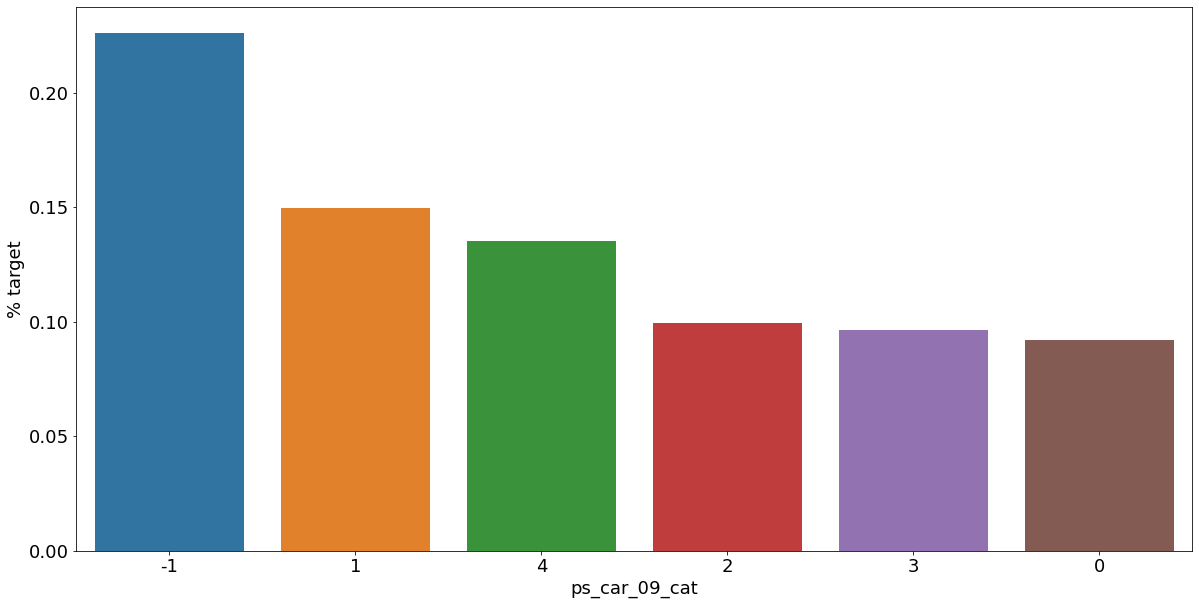

<Figure size 432x288 with 0 Axes>

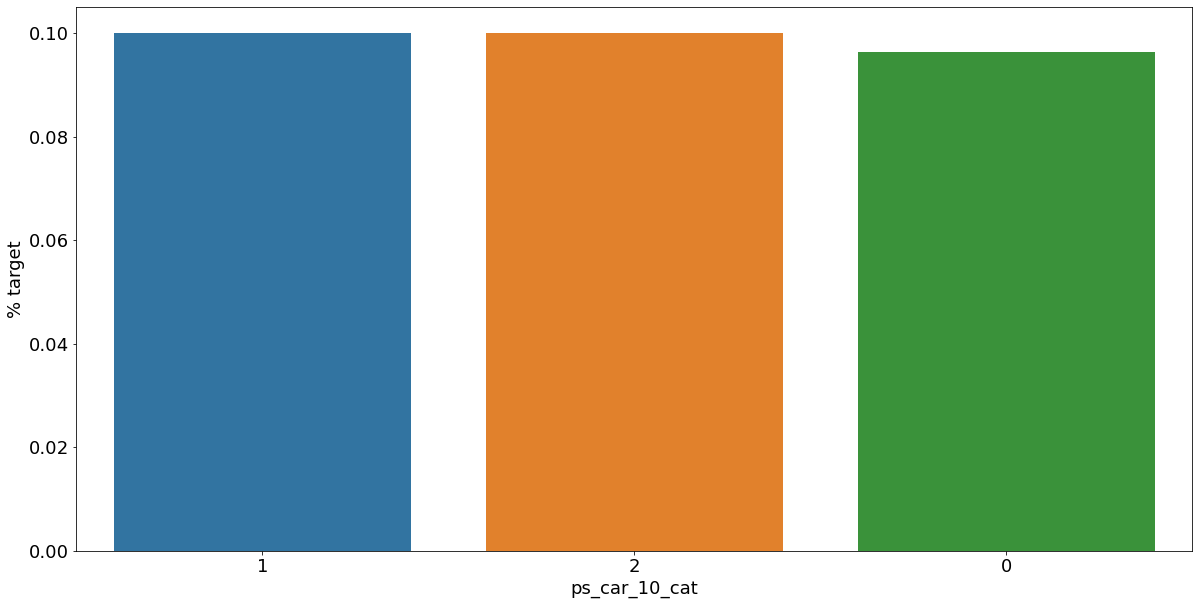

In [23]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # 범주 값별 target = 1의 비율 계산
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values('target', ascending=False, inplace=True)
    
    # Bar plot, target의 평균에 따라 정렬
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

결측값이 있는 변수들에서 볼 수 있듯이, 결측값을 다른 값으로 대체하지 않고 하나의 범주 값으로 분리하는 것은 좋은 생각인 것 같습니다. 결측값이 있는 고객들은 보험금을 청구할 확률이 더 높거나 더 낮은 것으로 나타납니다.

#### Interval variables
구간 변수들 간의 상관관계를 확인해봅시다. heatmap은 변수 간 상관관계를 보는 가장 좋은 방법입니다.

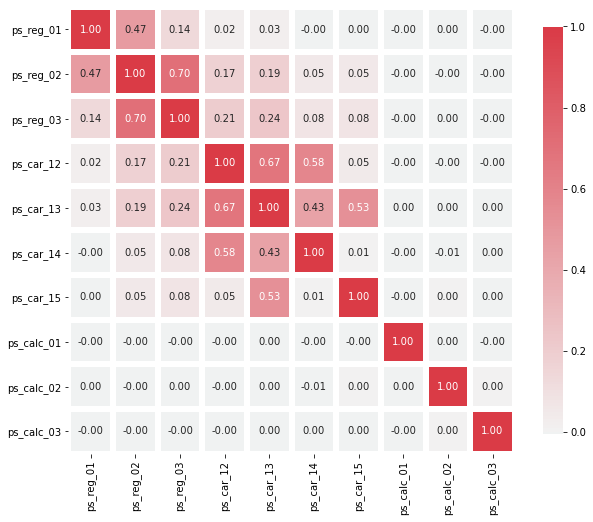

In [24]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # 두 색상 사이의 색상 맵 범위 생성
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=5, annot=True, cbar_kws={'shrink':.75})
    plt.show()

v = meta[(meta.level == 'interval')&(meta.keep)].index
corr_heatmap(v)

변수들 간에 강한 상관관계를 보이는 경우들이 있습니다.  
* ps_reg_02와 ps_reg_03 (0.47)  
* ps_car_12와 ps_car_13 (0.67)
* ps_car_12와 ps_car_14 (0.58)
* ps_car_13과 ps_car_15 (0.53)  

Seaborn에는 변수들 간 (선형)관계를 시각화하기 유용한 플롯들이 있습니다. 변수 간 관계를 시각화하기 위해 pairplot을 사용할 수 있습니다. 그러나 heatmap을 통해 이미 제한된 수의 상관관계를 확인했기 때문에 강한 상관관계를 가지는 변수들에 대해서만 분리해서 살펴보겠습니다.  
**참고**: 빠르게 진행하기 위해 트레이닝 데이터의 샘플을 사용합니다.

In [25]:
s = train.sample(frac=0.1)

##### ps_reg_02 & ps_reg_03
회귀 선에서 볼 수 있듯이, 이 변수들 간에는 선형 관계가 존재합니다. hue 파라미터 덕분에 target = 0과 target = 1에 대한 회귀선을 함께 볼 수 있습니다.

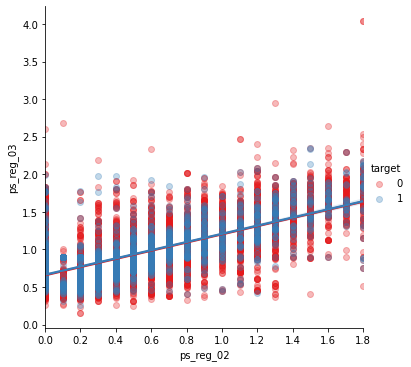

In [26]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_12 & ps_car_13

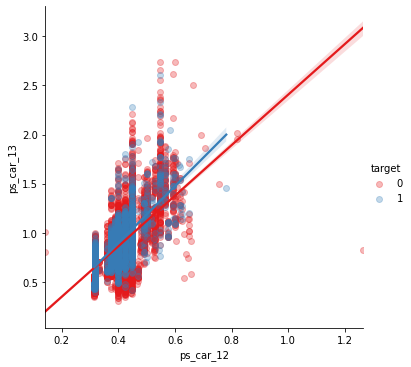

In [27]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_12 & ps_car_14

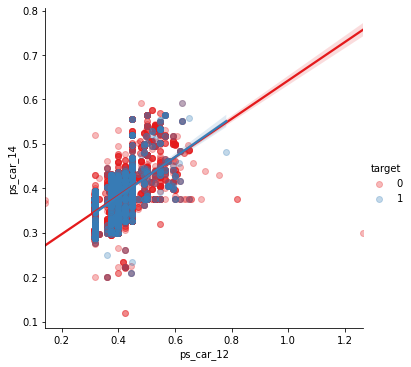

In [28]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_13 & ps_car_15

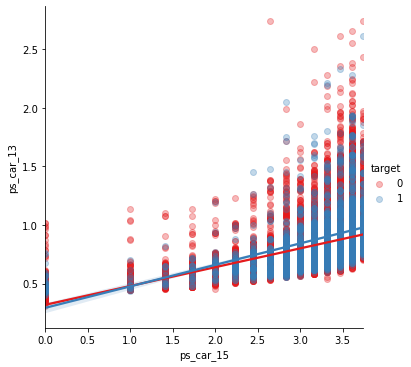

In [29]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

어떤 방법으로 상관관계에 있는 변수들을 유지할지 결정할 수 있을까요? 차원을 줄이기 위해 변수에 주성분분석(PCA)을 수행할 수 있습니다. AllState Claims Severity 대회에서 주성분분석을 위해 [커널](https://www.kaggle.com/bertcarremans/reducing-number-of-numerical-features-with-pca)을 만들었습니다. 그러나 상관관계에 있는 변수의 수가 적은 만큼 모델을 무겁게 할 것입니다.

#### Checking the correlations between ordinal variables

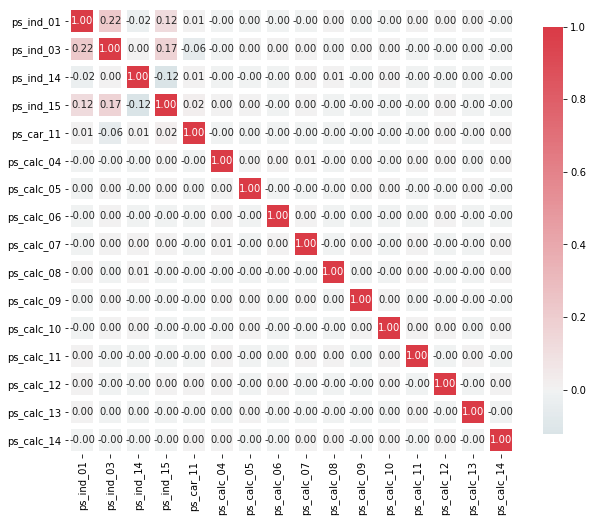

In [30]:
v = meta[(meta.level == 'ordinal')&(meta.keep)].index
corr_heatmap(v)

순서형 변수에는 상관관계가 별로 보이지 않습니다. 반면 target 값에 의해 그룹화되었을 때의 분포를 볼 수 있습니다.

### 7. Feature engineering

#### Creating dummy variables
범주형 변수들의 값은 순서나 크기를 나타내지 않습니다. 예를 들어, category 2는 category 1의 두 배가 아닙니다. 따라서 해당 변수들을 다루기 위해 더미 변수를 만들 수 있습니다. 첫 번째 더미 변수의 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제합니다.

In [31]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))

train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


더미 변수를 생성한 후 트레이닝 셋에 52개의 변수가 추가되었습니다.

#### Creating interaction variables

In [32]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
# 원래 변수 제거
interactions.drop(v, axis=1, inplace=True)
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


이것은 트레이닝 데이터에 부가적인 상호작용 변수가 추가됩니다. get_feature_names 메소드를 사용하여 이 새로운 변수들에 컬럼명을 줄 수 있습니다.

### 8. Feature selection

#### Removing features with low or zero variance
개인적으로, 분류기 알고리즘이 feature의 유지 여부를 선택하게 두는 것을 선호합니다. 우리가 스스로 할 수 있는 방법이 하나 있는데, 분산이 거의 없는 feature들을 제거하는 것입니다. Sklearn에는 **VarianceThreshold**라는 메소드가 있는데, 기본적으로 분산이 0인 feature들을 제거해줍니다. 이 대회에서는 이전 단계에서 분산이 0인 변수가 없는 것을 확인했기 때문에 적용할 수 없지만, 만약 분산이 1% 미만인 feature들을 제거하려 한다면 31개의 변수를 지울 수 있습니다.

In [33]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1))

f = np.vectorize(lambda x: not x)

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variable have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variable have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_ll_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산에 따라 선택하게 되면 너무 많은 변수들을 잃습니다. 우리는 변수가 많지 않기 때문에 분류기가 선택하도록 하겠습니다. 더 많은 변수를 가진 데이터 셋의 경우에는 이 작업이 실행 속도를 줄여줄 수 있습니다.  

Sklearn은 다른 [feature 선택법](https://scikit-learn.org/stable/modules/feature_selection.html)들도 함께 제공됩니다. 방법 중 하나는 SelectFromModel인데, 이것은 다른 분류기가 최적의 feature를 선택하게 합니다. 아래에서 랜덤포레스트를 사용하여 살펴봅시다.

#### Selecting features with a Random Forest and SelectFromModel
랜덤포레스트의 변수 중요도에 따라 feature를 선택하는 것을 기반으로 진행할 것입니다. Sklearn의 SelectFromModel을 사용하여 유지하고자 하는 변수의 수를 지정할 수 있습니다. 직접 변수 중요도의 수준에 대한 임계값을 설정할 수 있습니다. 그러나 우리는 단순히 상위 50%의 변수만 선택하겠습니다.  

다음 코드는 [Sebastian Raschka의 GitHub 레포](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb)에서 가져왔습니다. 이 저장소에는 그의 저서 *Python Machine Learning*에 대한 코드가 있는데, 이것은 반드시 읽어볼 만한 책입니다.

In [38]:
x_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

In [39]:
feat_labels = x_train.columns
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf.fit(x_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]
for f in range(x_train.shape[1]):
    print('%2d) %-*s %f'%(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_ll_cat_te               0.021424
 2) ps_car_13                      0.017416
 3) ps_car_12 ps_car_13            0.017319
 4) ps_car_13^2                    0.017234
 5) ps_car_13 ps_car_14            0.017227
 6) ps_reg_03 ps_car_13            0.017131
 7) ps_car_13 ps_car_15            0.016850
 8) ps_reg_01 ps_car_13            0.016786
 9) ps_reg_03 ps_car_14            0.016192
10) ps_reg_03 ps_car_12            0.015523
11) ps_reg_03 ps_car_15            0.015111
12) ps_car_14 ps_car_15            0.015043
13) ps_car_13 ps_calc_01           0.014721
14) ps_reg_01 ps_reg_03            0.014720
15) ps_car_13 ps_calc_03           0.014664
16) ps_reg_02 ps_car_13            0.014637
17) ps_car_13 ps_calc_02           0.014606
18) ps_reg_01 ps_car_14            0.014357
19) ps_reg_03                      0.014225
20) ps_reg_03^2                    0.014186
21) ps_reg_03 ps_calc_02           0.013780
22) ps_reg_03 ps_calc_03           0.013745
23) ps_reg_03 ps_calc_01        

SelectFromModel을 통해 사용하기에 적합한 분류기와 변수 중요도에 대한 임계값을 지정할 수 있습니다. get_support 메소드를 사용하여 트레이닝 데이터 내 변수의 수를 제한할 수 있습니다.

In [40]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(x_train.shape[1]))

n_features = sfm.transform(x_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [41]:
train = train[selected_vars + ['target']]

### 9. Feature scaling
이전에 말했던 것처럼 트레이닝 데이터에 표준 스케일링을 적용할 수 있습니다. 분류기에 따라 표준화 이후 성능이 좋아지기도 합니다.

In [42]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])

## Data Preparation & Exploration

**✏ 필사 2회** 

### Introduction
PorteSeguro 대회의 데이터에 대한 좋은 인사이트를 얻고, 모델링을 위해 데이터를 준비하는 방법을 주는데 초점을 두었습니다.  

1. Visual inspection of your data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

### 1. Visual inspection of your data

#### Loading packages

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

#### Loading data

In [44]:
train = pd.read_csv('../data/porto_train.csv')
test = pd.read_csv('../data/porto_test.csv')

#### Data at first site
대회의 데이터 설명 일부입니다.  

* 유사한 그룹에 속한 feature들은 feature 이름에 태그가 지정됩니다. (ind, reg, car, calc)  
* feature 이름은 뒷부분에 binary feature를 나타내는 **bin**과 범주형 feature를 나타내는 **cat**이 포함됩니다.  
* 이러한 이름이 없는 feature는 연속형이거나 순서형입니다.  
* **-1**은 결측값을 나타냅니다.  
* 타겟 컬럼은 해당 정책 소유자에 대한 클레임이 있는지의 여부를 나타냅니다.

In [45]:
train.head(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0


In [46]:
train.tail(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


우리는 다음과 같은 사항들을 확인할 수 있었습니다:  
* 이진변수  
* 정수로 된 범주형 변수
* 결측값 -1을 포함한 변수
* 타겟 변수와 ID 변수  

트레이닝 데이터의 행과 컬럼의 수를 살펴봅시다.

In [47]:
train.shape

(595212, 59)

In [48]:
train.drop_duplicates()
train.shape

(595212, 59)

컬럼 59개, 행 595,212개이며, 중복된 행은 존재하지 않습니다. 테스트 데이터에도 컬럼 개수가 같은지 확인해봅시다.

In [49]:
test.shape

(892816, 58)

테스트 셋에는 하나의 변수가 모자란데, 바로 타겟 변수입니다. 
이제 각 유형의 변수가 몇개인지 살펴봅시다.

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

info() 메소드를 사용하여 데이터의 타입을 확인할 수 있습니다. 데이터 셋에는 null값이 존재하지 않는데, 결측치가 이미 -1로 대체되었기 때문에 정상적인 모습입니다. 후에 다루도록 하겠습니다.

### 2. Defining the metadata
데이터 관리를 유용하게 하기 위해, 이제 데이터프레임에 변수들에 대한 메타정보를 저장하겠습니다. 이것은 분석, 시각화, 모델링 등을 위해 특정 변수를 선택하고자 할 때 유용할 것입니다.  

* **role**: input, ID, target
* **level**: nomial, interval, ordinal, binary
* **keep**: True or False
* **dtype**: int, float, str

In [51]:
data = []
for f in train.columns:
    # role 정의
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # level 정의
    if ('bin' in f) or (f == 'target'):
        level = 'binary'
    elif ('cat' in f) or (f == 'id'):
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
    
    # keep 생성, id만 false 입력
    keep = True
    if f == 'id':
        keep = False
    
    # dtype 정의
    dtype = train[f].dtype
    
    # 메타데이터 딕셔너리 생성
    f_dict = {
        'varname':f,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype':dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [52]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


예시로 제거되지 않은 변수를 추출해봅시다.

In [53]:
meta[(meta.level == 'nominal')&(meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

role과 level별 변수의 개수를 확인할 수 있습니다.

In [54]:
pd.DataFrame({'count':meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### 3. Descriptive statistics
또한 describe 메소드를 적용할 수 있습니다. 그러나 범주형 변수와 id 컬럼에 대한 평균, 표준편차 등을 계산하는 것은 별로 의미가 없습니다. 뒤에서 범주형 변수를 시각적으로 살펴보겠습니다.  

메타 파일 덕분에 기술통계를 계산할 변수들을 쉽게 선택할 수 있습니다. 좀더 확실하게 하기 위해 데이터 타입별로 확인해보겠습니다.

#### Interval variables

In [55]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**reg 변수**  
* ps_reg_03에만 결측값 존재
* 변수별로 최솟값~최댓값 범위가 다름. 사용할 분류기에 따라 StandardScaler와 같은 스케일링 사용  

**car 변수**  
* ps_car_12, ps_car_14에 결측값 존재
* 최솟값~최댓값 범위 다름

**calc 변수**  
* 결측값 없음
* 모든 calc 변수는 비슷한 분포를 가짐  

구간 변수들의 범위가 생각보다 작은 편임을 볼 수 있습니다. 데이터의 익명화를 위해 이미 로그와 같은 변환을 적용한 것이 아닐까요?

#### Ordinal variables

In [56]:
v = meta[(meta.level == 'ordinal')&(meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* 결측값은 ps_car_11에만 존재
* 다양한 범위를 다루기 위해 scaling 사용 가능

#### Binary variables

In [57]:
v = meta[(meta.level == 'binary')&(meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* target 데이터는 1의 비율이 36.45%로 매우 불균형합니다.
* 평균으로부터 대부분 값이 거의 0임을 알 수 있습니다.

### 4. Handling imbalanced classes
위에서 언급했던 것처럼 target=1이 target=0에 비해 훨씬 적습니다. 이것은 좋은 정확도를 주지만 실전에 사용되기는 어려운 모델이 될 수 있습니다. 이러한 문제를 다루기 위한 두 가지 가능한 전략이 있습니다.  

* target=1 기록에 대한 오버샘플링
* target=0 기록에 대한 언더샘플링  

더 많은 전략들이 있고, [MachineLearningMastery.com](MachineLearningMastery.com)에서 확인할 수 있습니다. 우리는 트레이닝 셋이 크기 때문에 언더샘플링을 진행할 수 있습니다.

In [58]:
desired_apriori = 0.10

# target 값의 인덱스
idx_0 = train[train['target'] == 0].index
idx_1 = train[train['target'] == 1].index

# target 값의 개수
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# target = 0인 데이터를 사용하여 언더샘플링 비율와 결과 레코드 수 계산
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# 원하는 apriori를 얻기 위해 랜덤으로 target = 0의 레코드 선택
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# 인덱스 충돌
idx_list = list(undersampled_idx) + list(idx_1)

# undersample 데이터프레임 리턴
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


### 5. Data quality checks

#### Checking missing values
결측값 = -1

In [59]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


* **ps_car_03_cat**과 **ps_car_05_cat**는 결측값이 너무 많으므로 변수를 제거합니다.
* 결측값이 있는 다른 범주형 변수들의 경우에는 -1을 그대로 둘 수 있습니다.
* **ps_reg_03**(연속형)은 18%의 결측값을 가지고 있으므로, 평균값으로 대체합니다.
* **ps_car_11**(순서형)은 1개의 결측값을 가지고 있으므로, 평균값으로 대체합니다.
* **ps_car_14**(연속형)는 7%의 결측값을 가지고 있으므로, 평균값으로 대체합니다.

In [60]:
# 결측값이 너무 많은 변수 제거
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False

In [61]:
# mean이나 mode값 입력
mean_imp = SimpleImputer(missing_values= -1, strategy='mean')
mode_imp = SimpleImputer(missing_values= -1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

#### Checking the cardinality of the categorical variables
cardinality는 변수의 여러 값들의 수를 나타냅니다. 후에 범주형 변수들로부터 더미 변수를 만들 것이기 때문에 범주 값이 많은지 확인해야 합니다. 이러한 변수들은 너무 많은 더미 변수를 만들어내기 때문에 다른 방법으로 처리해야 합니다.

In [62]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


**ps_car_11_cat**은 매우 많은 범주 값들을 가지고 있습니다.  

**수정**: [nickycan](https://www.kaggle.com/nickycan)은 내 첫 솔루션이 데이터 누수를 야기할 수 있다는 사실에 대한 훌륭한 발언을 했습니다. 또한 이것에 대해 다룬 [oliver](https://www.kaggle.com/ogrellier)의 커널을 알려주었습니다. 따라서 해당 부분은 oliver의 커널 내용으로 변경했습니다.

#### Target encoding with smoothing
min_samples_leaf는 이전 평균과 목표 평균이 같은 가중치를 가지는 임계값을 정의합니다. 이전 임계값 미만과 평균 이상은 더욱 중요해진다.  

가중치가 값의 개수에 따라 어떻게 변하는지는 평활화 파라미터에 의해 제어됩니다.

평활화는 [Daniele Micci-Barreca](https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf)의
자료를 따랐습니다.
* trn_series: Series 형태의 트레이닝 범주형 변수  
* tst_series: Series 형태의 테스트 범주형 변수  
* target: Series 형태의 target 데이터  
* min_samples_leaf: 범주 평균을 계산하기 위한 최소 샘플 수 (int)  
* smoothing: 범주형 평균과 이전 값의 균형을 맞추기 위한 평활화 효과 (int)  

In [63]:
# https://www.kaggle.com/ogrellier 참고
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level*np.random.randn(len(series)))

def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    # 조건이 맞지 않으면 AssertionError
    temp = pd.concat([trn_series, target], axis=1)
    
    # target 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    
    # 평활화 계산
    smoothing = 1 / (1 + np.exp(-(averages['count']-min_samples_leaf)/smoothing))
    
    # 모든 target 데이터에 평균 적용
    prior = target.mean()
    averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)
    
    # trn, tst 시리즈에 평균 적용
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # 인덱스 저장
    ft_trn_series.index = trn_series.index
    
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [64]:
train_encoded, test_encoded = target_encode(
    train['ps_car_11_cat'],
    test['ps_car_11_cat'],
    target=train.target,
    min_samples_leaf=100,
    smoothing=10,
    noise_level=0.01
)
train['ps_car_ll_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

### 6. Exploratory data visualization

#### Categorical variables
범주형 변수와 target = 1의 비율을 확인해봅시다.

<Figure size 432x288 with 0 Axes>

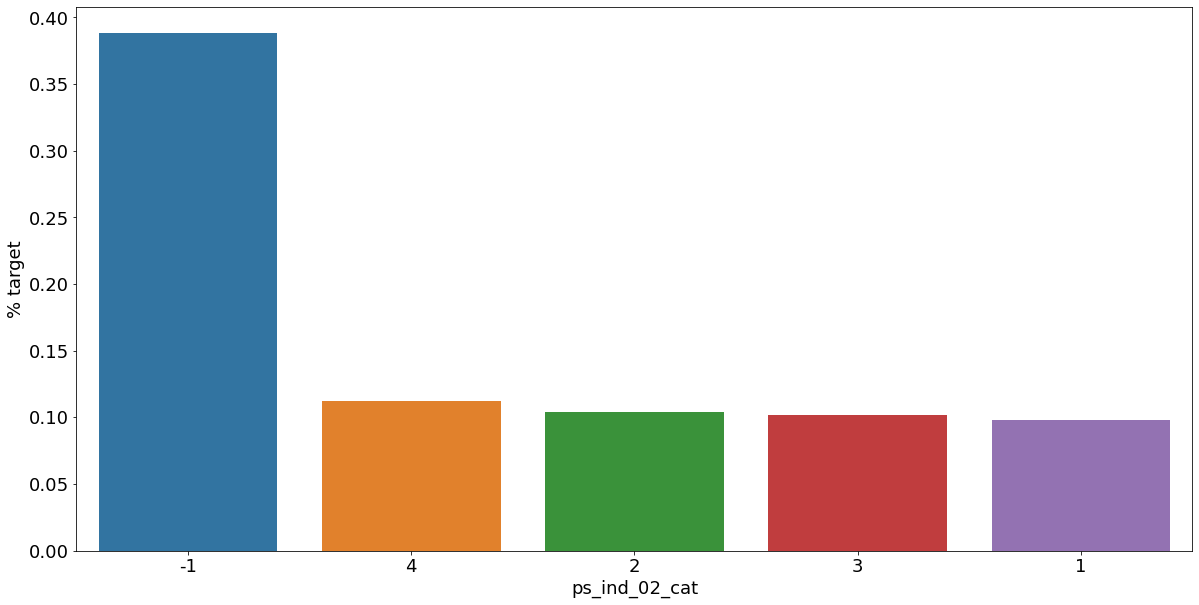

<Figure size 432x288 with 0 Axes>

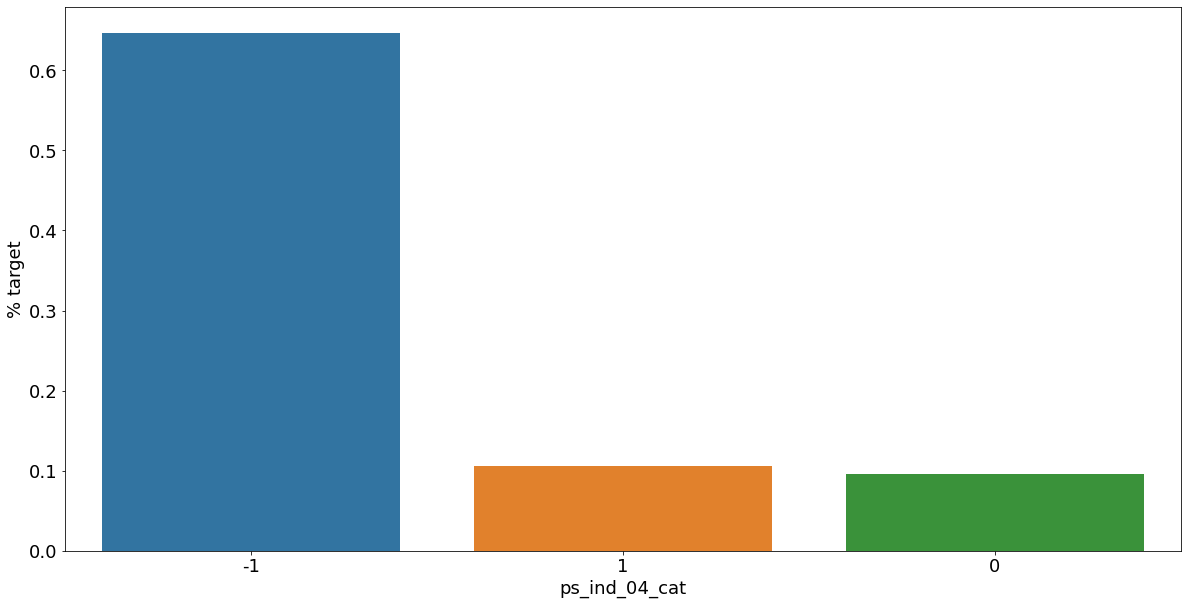

<Figure size 432x288 with 0 Axes>

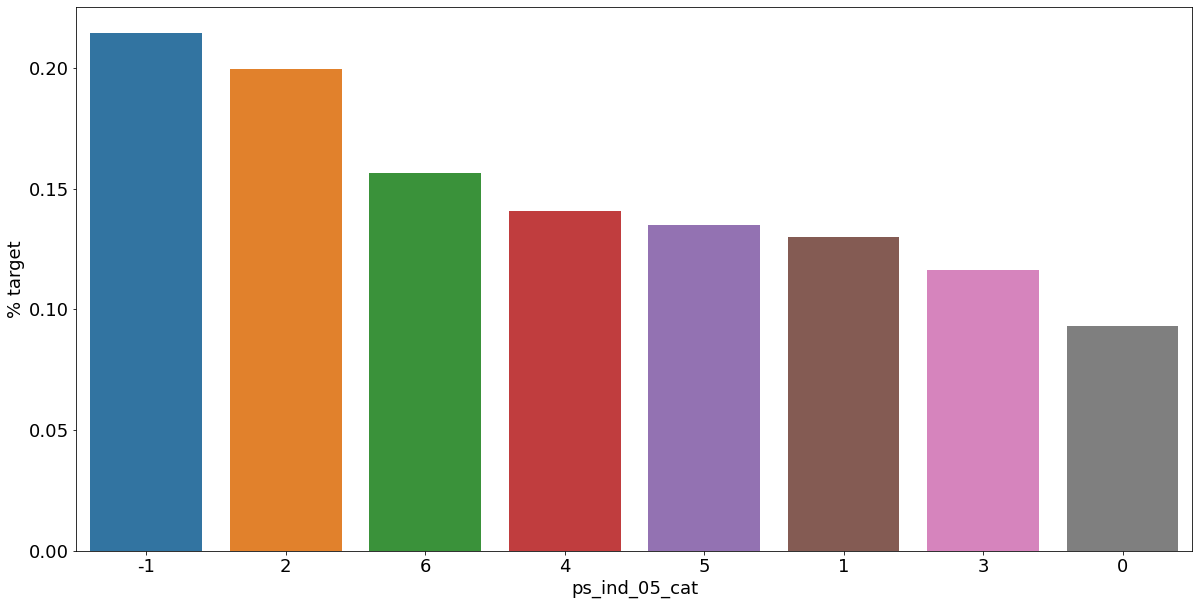

<Figure size 432x288 with 0 Axes>

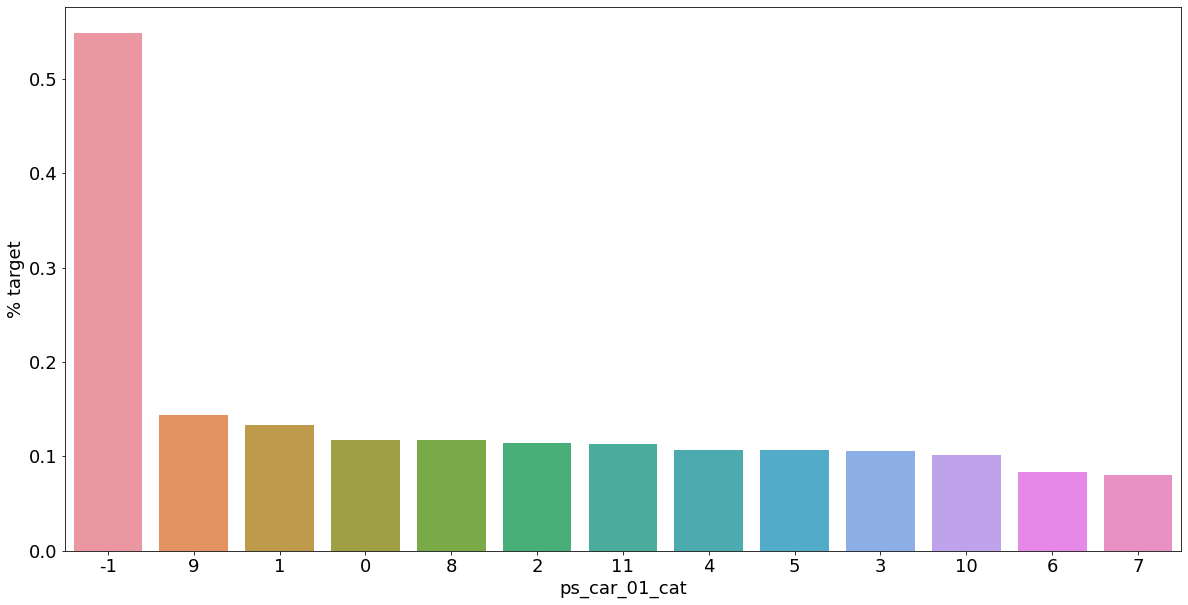

<Figure size 432x288 with 0 Axes>

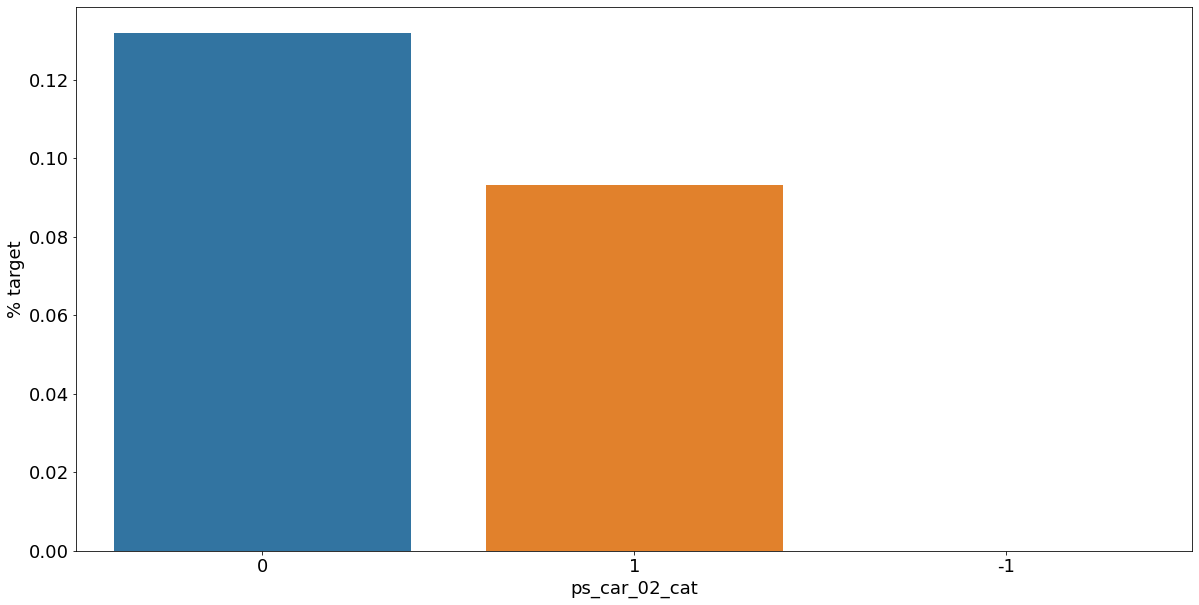

<Figure size 432x288 with 0 Axes>

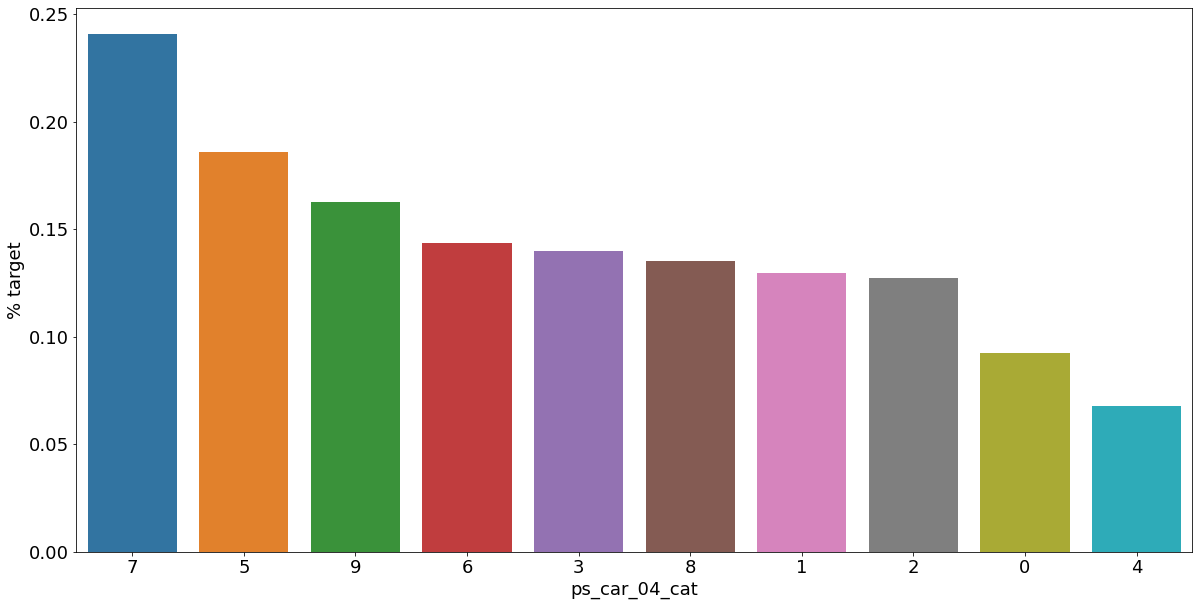

<Figure size 432x288 with 0 Axes>

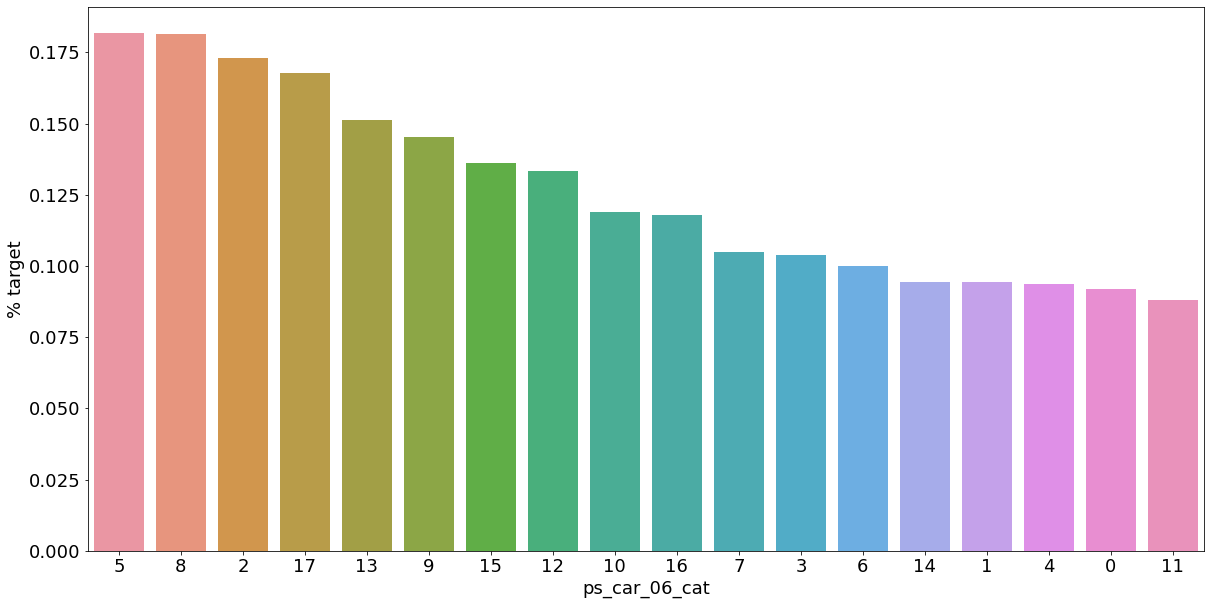

<Figure size 432x288 with 0 Axes>

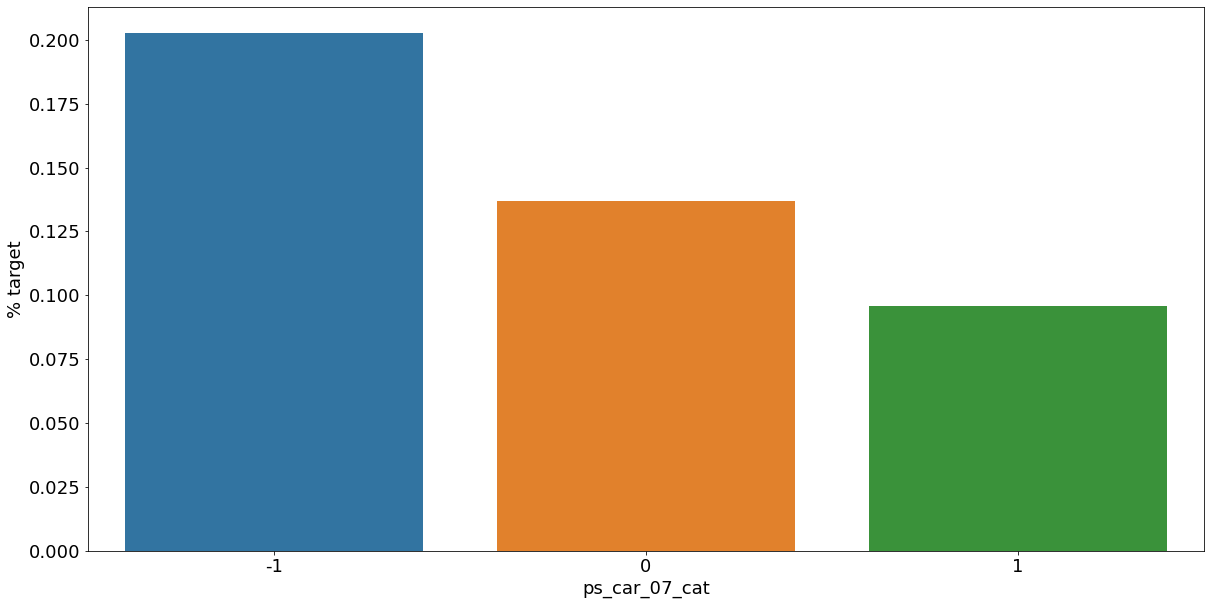

<Figure size 432x288 with 0 Axes>

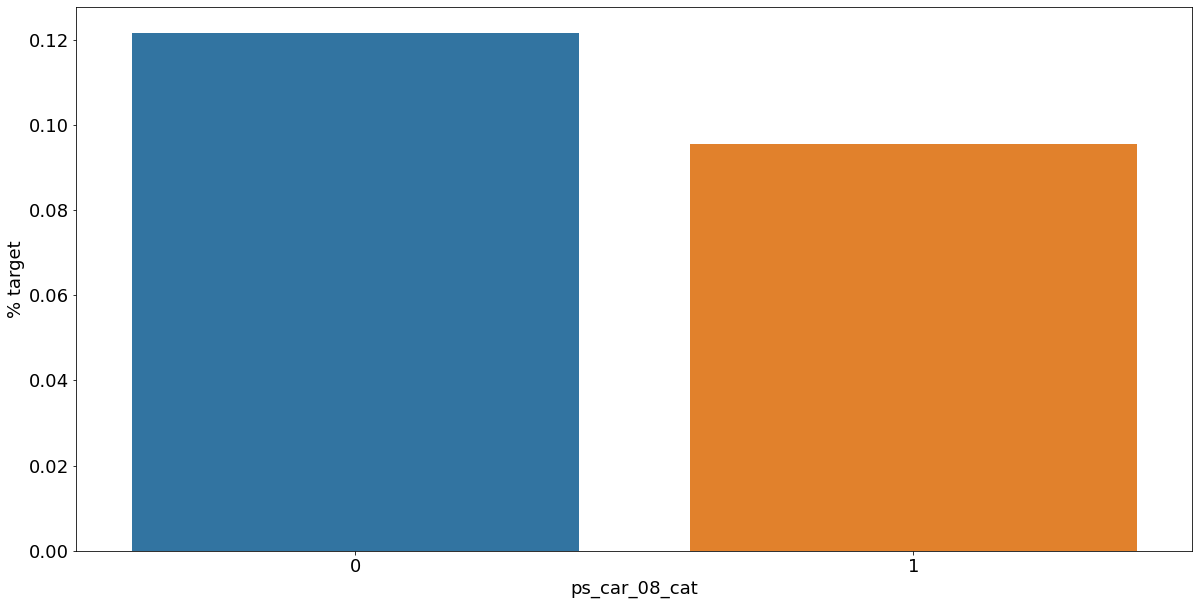

<Figure size 432x288 with 0 Axes>

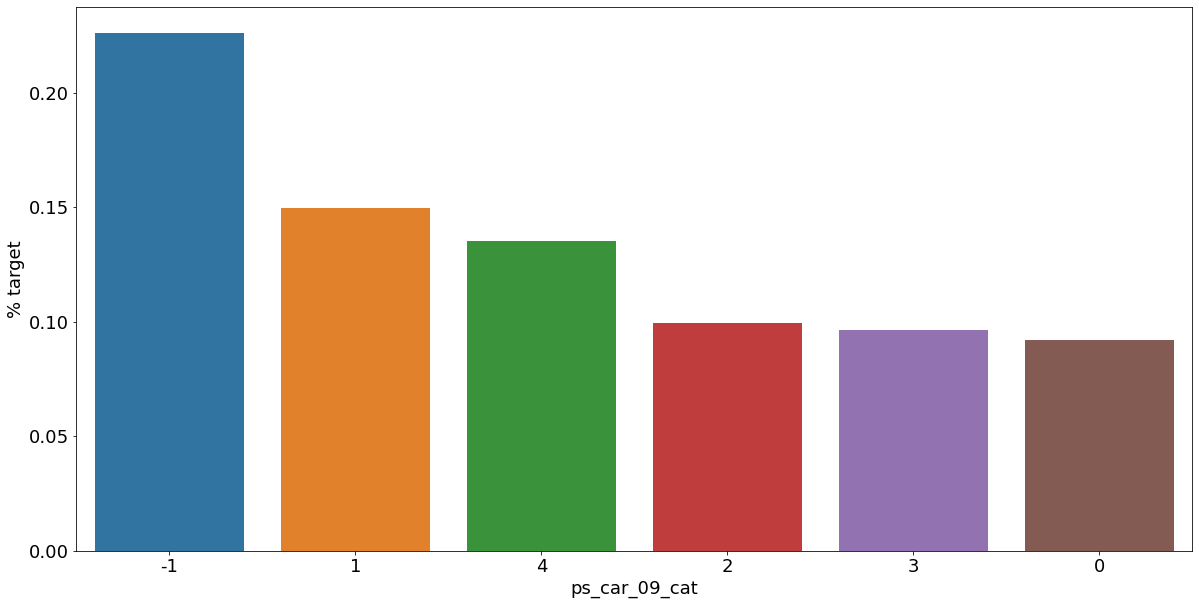

<Figure size 432x288 with 0 Axes>

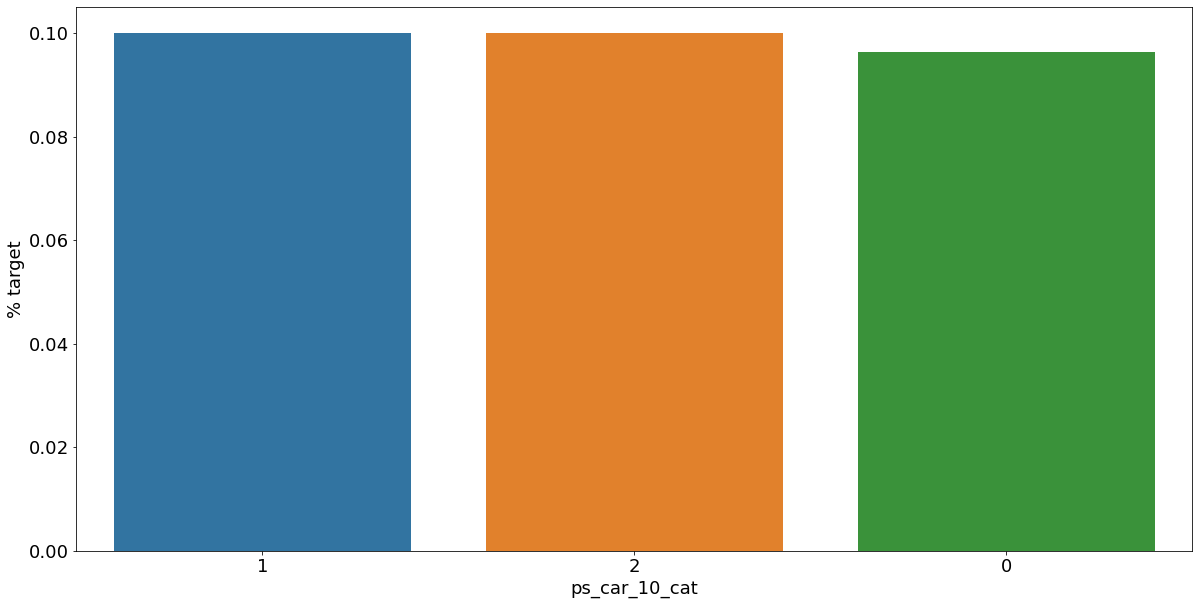

In [65]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # 범주 값별 target = 1의 비율 계산
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values('target', ascending=False, inplace=True)
    
    # Bar plot, target의 평균에 따라 정렬
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

결측값이 있는 변수들에서 볼 수 있듯이, 결측값을 다른 값으로 대체하지 않고 하나의 범주 값으로 분리하는 것은 좋은 생각인 것 같습니다. 결측값이 있는 고객들은 보험금을 청구할 확률이 더 높거나 더 낮은 것으로 나타납니다.

#### Interval variables
구간 변수들 간의 상관관계를 확인해봅시다. heatmap은 변수 간 상관관계를 보는 가장 좋은 방법입니다.

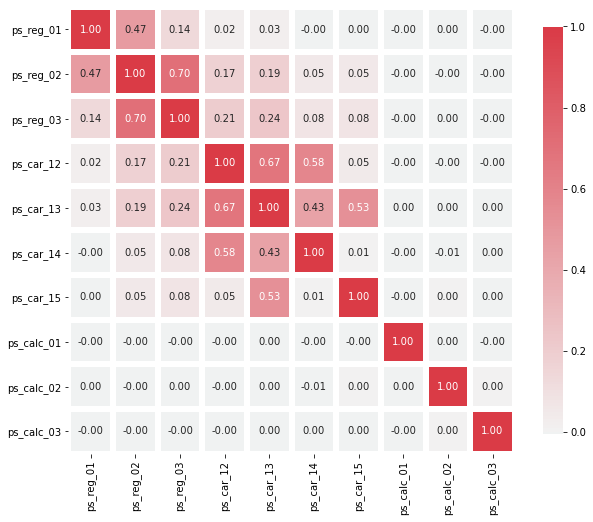

In [66]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # 두 색상 사이의 색상 맵 범위 생성
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=5, annot=True, cbar_kws={'shrink':.75})
    plt.show()

v = meta[(meta.level == 'interval')&(meta.keep)].index
corr_heatmap(v)

변수들 간에 강한 상관관계를 보이는 경우들이 있습니다.  
* ps_reg_02와 ps_reg_03 (0.47)  
* ps_car_12와 ps_car_13 (0.67)
* ps_car_12와 ps_car_14 (0.58)
* ps_car_13과 ps_car_15 (0.53)  

Seaborn에는 변수들 간 (선형)관계를 시각화하기 유용한 플롯들이 있습니다. 변수 간 관계를 시각화하기 위해 pairplot을 사용할 수 있습니다. 그러나 heatmap을 통해 이미 제한된 수의 상관관계를 확인했기 때문에 강한 상관관계를 가지는 변수들에 대해서만 분리해서 살펴보겠습니다.  
**참고**: 빠르게 진행하기 위해 트레이닝 데이터의 샘플을 사용합니다.

In [67]:
s = train.sample(frac=0.1)

##### ps_reg_02 & ps_reg_03
회귀 선에서 볼 수 있듯이, 이 변수들 간에는 선형 관계가 존재합니다. hue 파라미터 덕분에 target = 0과 target = 1에 대한 회귀선을 함께 볼 수 있습니다.

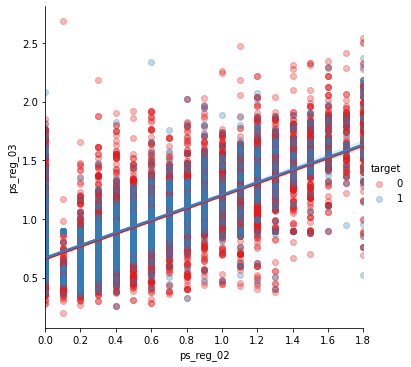

In [68]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_12 & ps_car_13

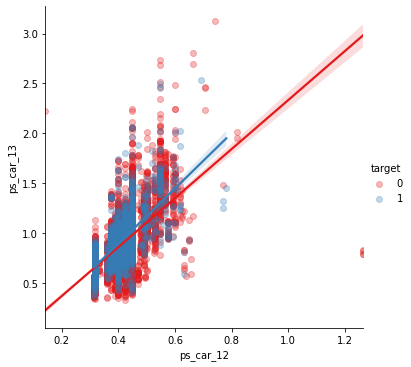

In [69]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_12 & ps_car_14

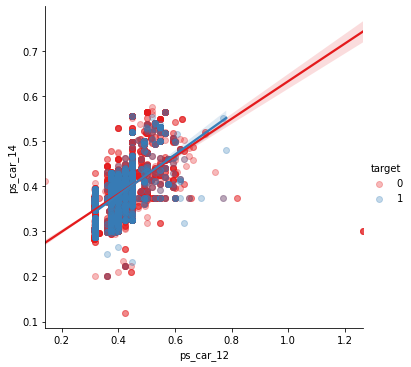

In [70]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

##### ps_car_13 & ps_car_15

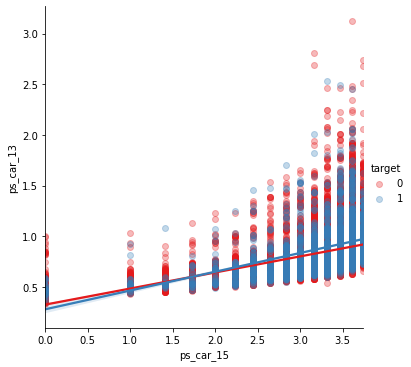

In [71]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

어떤 방법으로 상관관계에 있는 변수들을 유지할지 결정할 수 있을까요? 차원을 줄이기 위해 변수에 주성분분석(PCA)을 수행할 수 있습니다. AllState Claims Severity 대회에서 주성분분석을 위해 [커널](https://www.kaggle.com/bertcarremans/reducing-number-of-numerical-features-with-pca)을 만들었습니다. 그러나 상관관계에 있는 변수의 수가 적은 만큼 모델을 무겁게 할 것입니다.

#### Checking the correlations between ordinal variables

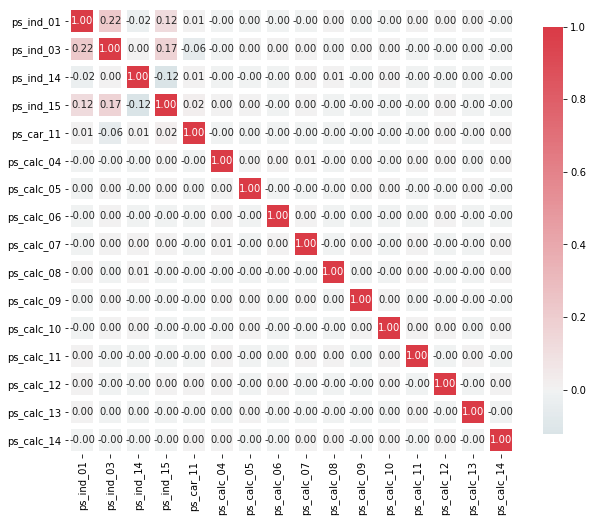

In [72]:
v = meta[(meta.level == 'ordinal')&(meta.keep)].index
corr_heatmap(v)

순서형 변수에는 상관관계가 별로 보이지 않습니다. 반면 target 값에 의해 그룹화되었을 때의 분포를 볼 수 있습니다.

### 7. Feature engineering

#### Creating dummy variables
범주형 변수들의 값은 순서나 크기를 나타내지 않습니다. 예를 들어, category 2는 category 1의 두 배가 아닙니다. 따라서 해당 변수들을 다루기 위해 더미 변수를 만들 수 있습니다. 첫 번째 더미 변수의 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제합니다.

In [73]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))

train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


더미 변수를 생성한 후 트레이닝 셋에 52개의 변수가 추가되었습니다.

#### Creating interaction variables

In [74]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
# 원래 변수 제거
interactions.drop(v, axis=1, inplace=True)
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


이것은 트레이닝 데이터에 부가적인 상호작용 변수가 추가됩니다. get_feature_names 메소드를 사용하여 이 새로운 변수들에 컬럼명을 줄 수 있습니다.

### 8. Feature selection

#### Removing features with low or zero variance
개인적으로, 분류기 알고리즘이 feature의 유지 여부를 선택하게 두는 것을 선호합니다. 우리가 스스로 할 수 있는 방법이 하나 있는데, 분산이 거의 없는 feature들을 제거하는 것입니다. Sklearn에는 **VarianceThreshold**라는 메소드가 있는데, 기본적으로 분산이 0인 feature들을 제거해줍니다. 이 대회에서는 이전 단계에서 분산이 0인 변수가 없는 것을 확인했기 때문에 적용할 수 없지만, 만약 분산이 1% 미만인 feature들을 제거하려 한다면 31개의 변수를 지울 수 있습니다.

In [75]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1))

f = np.vectorize(lambda x: not x)

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variable have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variable have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_ll_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산에 따라 선택하게 되면 너무 많은 변수들을 잃습니다. 우리는 변수가 많지 않기 때문에 분류기가 선택하도록 하겠습니다. 더 많은 변수를 가진 데이터 셋의 경우에는 이 작업이 실행 속도를 줄여줄 수 있습니다.  

Sklearn은 다른 [feature 선택법](https://scikit-learn.org/stable/modules/feature_selection.html)들도 함께 제공됩니다. 방법 중 하나는 SelectFromModel인데, 이것은 다른 분류기가 최적의 feature를 선택하게 합니다. 아래에서 랜덤포레스트를 사용하여 살펴봅시다.

#### Selecting features with a Random Forest and SelectFromModel
랜덤포레스트의 변수 중요도에 따라 feature를 선택하는 것을 기반으로 진행할 것입니다. Sklearn의 SelectFromModel을 사용하여 유지하고자 하는 변수의 수를 지정할 수 있습니다. 직접 변수 중요도의 수준에 대한 임계값을 설정할 수 있습니다. 그러나 우리는 단순히 상위 50%의 변수만 선택하겠습니다.  

다음 코드는 [Sebastian Raschka의 GitHub 레포](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb)에서 가져왔습니다. 이 저장소에는 그의 저서 *Python Machine Learning*에 대한 코드가 있는데, 이것은 반드시 읽어볼 만한 책입니다.

In [76]:
x_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

In [77]:
feat_labels = x_train.columns
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf.fit(x_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]
for f in range(x_train.shape[1]):
    print('%2d) %-*s %f'%(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_ll_cat_te               0.021159
 2) ps_car_13                      0.017344
 3) ps_car_12 ps_car_13            0.017339
 4) ps_car_13^2                    0.017306
 5) ps_car_13 ps_car_14            0.017216
 6) ps_reg_03 ps_car_13            0.017083
 7) ps_car_13 ps_car_15            0.016867
 8) ps_reg_01 ps_car_13            0.016749
 9) ps_reg_03 ps_car_14            0.016257
10) ps_reg_03 ps_car_12            0.015548
11) ps_reg_03 ps_car_15            0.015187
12) ps_car_14 ps_car_15            0.015093
13) ps_car_13 ps_calc_01           0.014779
14) ps_car_13 ps_calc_03           0.014700
15) ps_reg_02 ps_car_13            0.014693
16) ps_reg_01 ps_reg_03            0.014619
17) ps_car_13 ps_calc_02           0.014613
18) ps_reg_01 ps_car_14            0.014372
19) ps_reg_03^2                    0.014245
20) ps_reg_03                      0.014184
21) ps_reg_03 ps_calc_03           0.013808
22) ps_reg_03 ps_calc_02           0.013783
23) ps_reg_03 ps_calc_01        

SelectFromModel을 통해 사용하기에 적합한 분류기와 변수 중요도에 대한 임계값을 지정할 수 있습니다. get_support 메소드를 사용하여 트레이닝 데이터 내 변수의 수를 제한할 수 있습니다.

In [78]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(x_train.shape[1]))

n_features = sfm.transform(x_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [79]:
train = train[selected_vars + ['target']]

### 9. Feature scaling
이전에 말했던 것처럼 트레이닝 데이터에 표준 스케일링을 적용할 수 있습니다. 분류기에 따라 표준화 이후 성능이 좋아지기도 합니다.

In [80]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])